# Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

In [2]:
abs_df = pd.read_csv(r"/home/bioinfo/Nilesh/Pathogenic_Landscape/Pathogenic-Landscape-Project/data/absolute/clinical_research_filtered_combined/dataframes/absolute_df.csv")
indi_df = pd.read_csv(r"/home/bioinfo/Nilesh/Pathogenic_Landscape/Pathogenic-Landscape-Project/data/indigene/indig_df.csv")
indi_df = indi_df.drop(columns=['Chr_SERA'])

In [3]:
print(abs_df.shape)

(3356501, 20)


In [4]:
print(indi_df.shape)

(46788, 20)


In [5]:
# Appending with Data Classification
abs_df["Data Classification"] = "Exome Panel/Absolute"
indi_df["Data Classification"] = "Targeted Panel/Indigene"
abs_indi_combo = pd.concat([abs_df, indi_df], ignore_index=True)

print(abs_indi_combo.shape)

(3403289, 21)


In [ ]:
# Load data
# ogdf = pd.read_excel(r'H:\My Drive\Pathogenic_Landscape\assets\absolute_indie_patho\absolute_Indie_patho.xlsx')

In [6]:
ogdf = abs_indi_combo

Total number of variants = 34,03,289

In [7]:
print(ogdf.shape)

(3403289, 21)


Total number of samples = 3740

In [8]:
# Number of unique samples
unique_sample_count = ogdf['Sample_Name'].nunique()

print(unique_sample_count)

3740


In [9]:
# Get the list of unique sample names
# unique_samples = ogdf['Sample_Name'].unique()

# Save to a text file, each sample on a new line
# with open("unique_samples.txt", "w") as f:
#     for sample in unique_samples:
#         f.write(str(sample) + "\n")

In [10]:
ogdf.head(n=500)

,Sample_Name,CHROM_x,POS_x,End_x,REF_x,ALT_x,Ref.Gene,Func.ensGene,ExonicFunc.ensGene,AAChange.ensGene,...,avsnp150,CLNDN,CLNDISDB,clinvar: Clinvar,Hotspot,OncoG_TSG,Kinase,Cancer,Cancer_Short,Data Classification
0,IN-423-TKKC-F-Merged,chr1,1374966.0,1374966.0,TG,T,VWA1,exonic,frameshift deletion,ENSG00000179403:ENST00000404702:exon3:c.501del...,...,.,.,.,clinvar: UNK,0,NaN,0,Lung,LC,Exome Panel/Absolute
1,IN-423-TKKC-F-Merged,chr1,1581065.0,1581065.0,G,C,CDK11B,intronic,.,.,...,rs77085542,.,.,clinvar: UNK,0,NaN,0,Lung,LC,Exome Panel/Absolute
2,IN-423-TKKC-F-Merged,chr1,1961365.0,1961365.0,G,T,GABRD,intronic,.,.,...,.,.,.,clinvar: UNK,0,NaN,0,Lung,LC,Exome Panel/Absolute
3,IN-423-TKKC-F-Merged,chr1,3102848.0,3102848.0,C,T,PRDM16,exonic,nonsynonymous SNV,ENSG00000142611:ENST00000270722:exon2:c.C197T:...,...,rs374012976,Left_ventricular_noncompaction_8,"MedGen:C3809288,OMIM:615373",clinvar: Uncertain_significance,0,NaN,0,Lung,LC,Exome Panel/Absolute
4,IN-423-TKKC-F-Merged,chr1,6515380.0,6515380.0,G,T,ESPN,intronic,.,.,...,rs75827056,.,.,clinvar: UNK,0,NaN,0,Lung,LC,Exome Panel/Absolute
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,IN-423-TKKC-F-Merged,chr10,71021008.0,71021008.0,C,T,HKDC1,exonic,nonsynonymous SNV,ENSG00000156510:ENST00000354624:exon16:c.C2330...,...,rs553070057,.,.,clinvar: UNK,0,NaN,0,Lung,LC,Exome Panel/Absolute
496,IN-423-TKKC-F-Merged,chr10,72541762.0,72541764.0,ACTT,A,TBATA,exonic,nonframeshift deletion,ENSG00000166220:ENST00000456372:exon2:c.70_72d...,...,rs756010080,.,.,clinvar: UNK,0,NaN,0,Lung,LC,Exome Panel/Absolute
497,IN-423-TKKC-F-Merged,chr10,75012299.0,75012299.0,G,T,DNAJC9-AS1,ncRNA_intronic,.,.,...,.,.,.,clinvar: UNK,0,NaN,0,Lung,LC,Exome Panel/Absolute
498,IN-423-TKKC-F-Merged,chr10,75561197.0,75561197.0,C,A,ZSWIM8,exonic,nonsynonymous SNV,ENSG00000214655:ENST00000398706:exon26:c.C5449...,...,rs570838602,.,.,clinvar: UNK,0,NaN,0,Lung,LC,Exome Panel/Absolute


In [14]:
ogdf.head().to_clipboard()

Clinvar Variant Annotations and their count

In [11]:
ogdf['clinvar: Clinvar '].value_counts()

clinvar: Clinvar 
clinvar: UNK                                                              3358748
clinvar: Uncertain_significance                                             22305
clinvar: Conflicting_interpretations_of_pathogenicity                       13510
clinvar: Pathogenic                                                          3823
clinvar: not_provided                                                        1606
clinvar: Likely_pathogenic                                                   1439
clinvar: Pathogenic/Likely_pathogenic                                         848
clinvar: other                                                                296
clinvar: drug_response                                                        280
.                                                                             105
clinvar: Conflicting_interpretations_of_pathogenicity,_risk_factor             92
clinvar: Likely_pathogenic,_risk_factor                                        4

---


In [15]:
# Create a dictionary mapping Sample_Name to the desired Cancer value
cancer_mapping = {
    "IN-423-UAMB-F-RE": "Small Intestine",
    "IN-423-UCDF-F-IE": "Small Intestine",
    "IN-423-UCSA-F-SSE": "Germ Cell",
    "IN-423-UCXA-F-SSE": "Skin",
    "IN-423-UDGA-F-SSE": "Adrenal gland",
    "IN-423-UDHB-F-SSE": "Retroperitoneum and Peritoneum",
    "IN-423-UFVA-F-SSE-S2": "Intestinal tract",
    "UG1A-F-SE8": "Skin",
    "UG1C-F-SE8": "Retroperitoneum and Peritoneum",
    "UHLD-F-SE8": "Melenoma",
    "UHPE-F-SE8-S9": "Spinal Cord and Other Central Nervous System",
    "UIBA-F-SE8-S23": "Germ Cell",
    "UJ2A-F-SE8-S16": "Solitary fibroid tumor right knee with lung metastasis",
    "UKIE-F2-RSQ-Merged-S5": "Testis",
    "ULXD-Z-SE8-S28": "Penile",
    "VAUD-F-SE8": "Adrenal gland",
    "VDDD-F-SE8-S21": "Small Intestine",
    "VHAO-F2-SE8-S5-L004": "Intestinal tract",
    "VHDD-F-SE8-S3": "Other endocrine glands",
    "WKKAJ-F-L2-D-SE8-S1": "Thymus",
    "1673-IE-CA": "Mixed",
    "2509-IE-CA": "Mixed",
    "4522-IE-CA": "Mixed",
    "5097-IE-CA": "Mixed",
    "5123-IE-CA": "Mixed",
    "5519-IE-CA": "Mixed",
    "7664-IE-CA": "Mixed",
    "8613-IE-CA": "Mixed",
    "9337-IE-CA": "Mixed",
    "12143-IE-CA": "Mixed",
    "12313-IE-CA": "Mixed",
    "12779-IE-CA": "Mixed",
    "13227-IE-CA": "Mixed",
    "13439-IE-CA": "Mixed",
    "13553-IE-CA": "Mixed",
    "14476-IE-CA": "Mixed",
    "15524-IE-CA": "Mixed",
    "15893-IE-CA": "Mixed",
    "18342-IE-CA": "Mixed",
    "20903-IE-CA": "Mixed",
    "AD-1956B-cutadapt": "Skin",
    "AD-1957A-cutadapt": "Skin",
    "AD2638-cutadapt": "Skin",
    "AD2639-B-cutadapt": "Skin",
    "AD2642-2-cutadapt": "Skin",
    "AD2647B-cutadapt": "Skin",
    "ML02934-SSE-CA": "Penile",
    "ML02939-SSE-CA": "Penile",
    "ML02943-SSE-CA": "Penile",
    "ML02952-SSE-CA": "Penile",
    "ML02956-SSE-CA": "Penile",
    "ML02960-SSE-CA": "Penile",
    "VHCH-F-CE-S40": "Thymus",
    "VHDD-F1F2-D-CE-S110": "Other endocrine glands",
    "VHIW-F2-CE-R-S39": "Testis",
    "VHQB-F-CE-R-S31": "Thymus",
    "VIFP-F-CE-S5": "Penile",
    "VIGB-F-CE-S76-S1-L001": "Heart",
    "VJ1B-F-CE-S24": "Penile",
    "VJ5U-F-D-CE-S55": "Thymus",
    "VKPL-F-D-CE-S23": "Thymus",
    "VL1V-F-D-CE-SL-S35": "Heart",
    "VLAS-F-D-CE-S19": "Testis",
    "VLGJ-F-D-CE-S5": "Penile",
    "VLLF-F-D-CE-S4": "Lymphnode",
    "VLNM-F-D-CE-S30": "Penile",
    "W4KC-F1F2-D-CE-S50": "Spinal Cord and Other Central Nervous System",
    "W4XP-F-D-CE-S38-L002": "Adrenal gland",
    "W9HAK-F1-D-CE-S1": "Lymphnode",
    "WAIV-F-D-CE-S43": "Testis",
    "WAJG-F-D-CE-S53": "Adrenal gland",
    "WBFQ-F-D-CE-S72": "Heart",
    "WBXB-F-D-CE-S49": "Penile",
    "WCCA-F-D-CE-S60": "Penile",
    "WDFE-F1F2-D-CE-S60": "Thymus",
    "WEBM-F-D-L2-CE-S11": "Heart",
    "WF34-F-CE-S1": "Heart",
    "WFES-F1-D-CE-S213-L004": "Ureter",
    "WFNJ-F1F2-D-CE-S1": "Heart",
    "WGHAL-F1-CE-S1": "Adrenal gland",
    "WH3AQ-F-D-CE-S1": "Heart",
    "WH6AL-F-D-CE-S1": "Thymus",
    "WJ7AQ-F-D-CE-S1": "Adrenal gland",
    "WLNA9-F2-D-CE-S1": "Lymphnode",
    "X43AG-F-D-L2-CE-S1": "Spinal Cord and Other Central Nervous System",
    "X4SBG-F2-D-CE-S1": "Heart",
    "XBXAC-F1-D-CE-S1": "Testis",
    "XCPAH-F-D-CE-S1": "Ureter",
    "XCPAL-F1-D-CE-S1": "Penile",
    "XETA4-F1F2-D-L2L1-CE-S1": "Adrenal gland",
    "XF1AT-F1F2-D-CE-S1": "Thymus",
    "XG7AO-F-D-CE-S1": "Other endocrine glands",
    "XGABB-F-D-CE-S1": "Lymphnode",
    "XHWAN-F1-D-CE-S1": "Penile"
}

# Update the 'Cancer' column for the rows with sample names in the mapping
ogdf.loc[ogdf['Sample_Name'].isin(cancer_mapping.keys()), 'Cancer'] = ogdf['Sample_Name'].map(cancer_mapping)


In [16]:
# Cancer Counts
df = ogdf.copy()
df.groupby('Cancer')['Sample_Name'].nunique().reset_index(name='Unique_Sample_Count')

,Cancer,Unique_Sample_Count
0,Adrenal gland,7
1,Brain,45
2,Breast,305
3,Cervix,49
4,Esophagus,88
5,Gallbladder,135
6,Germ Cell,2
7,Head and Neck,94
8,Heart,8
9,Intestinal tract,2


In [17]:
# Compute the unique sample counts for each Cancer type
cancer_counts = df.groupby('Cancer')['Sample_Name'].nunique()

# Identify cancer types with fewer than 25 unique samples
cancers_to_replace = cancer_counts[cancer_counts < 25].index

# Replace the Cancer value with 'Others' for these cases
df.loc[df['Cancer'].isin(cancers_to_replace), 'Cancer'] = 'Others'

In [18]:
df.groupby('Cancer')['Sample_Name'].nunique().reset_index(name='Unique_Sample_Count')

,Cancer,Unique_Sample_Count
0,Brain,45
1,Breast,305
2,Cervix,49
3,Esophagus,88
4,Gallbladder,135
5,Head and Neck,94
6,Kidney,39
7,Large Intestine,289
8,Liver and intrahepatic bile ducts,159
9,Lung,740


In [ ]:
df.head()

In [19]:
# Mapping Dictionary
cancer_mapping = {
    "Brain": "BrC",
    "Breast": "BC",
    "Cervix": "CC",
    "Esophagus": "EC",
    "Gallbladder": "GBC",
    "Head and Neck": "HNC",
    "Kidney": "KC",
    "Large Intestine": "LIC",
    "Liver and intrahepatic bile ducts": "LBC",
    "Lung": "LC",
    "Oral": "OC",
    "Others": "Others",
    "Ovary": "OvC",
    "Pancreas": "PC",
    "Prostate": "PrC",
    "Rectum": "RC",
    "Sarcoma": "SC",
    "Stomach": "StC",
    "Thyroid": "TC",
    "Unknown primary": "UPC",
    "Urinary Bladder": "UBC",
    "Uterus": "UtC",
    "Retroperitoneum and Peritoneum": "RePC",
    "Skin": "SkC",
    "Small Intestine": "SIC"
}

# Apply mapping
df["Cancer_Short"] = df["Cancer"].map(cancer_mapping)

In [20]:
# Cancer Counts
df.groupby(['Cancer_Short', 'Cancer'])['Sample_Name'].nunique().reset_index(name='Unique_Sample_Count')


,Cancer_Short,Cancer,Unique_Sample_Count
0,BC,Breast,305
1,BrC,Brain,45
2,CC,Cervix,49
3,EC,Esophagus,88
4,GBC,Gallbladder,135
5,HNC,Head and Neck,94
6,KC,Kidney,39
7,LBC,Liver and intrahepatic bile ducts,159
8,LC,Lung,740
9,LIC,Large Intestine,289


In [21]:
df_cancercounts = df.groupby(['Cancer_Short', 'Cancer'])['Sample_Name'].nunique().reset_index(name='Unique_Sample_Count')
df_cancercounts.to_clipboard()

In [23]:
df_others = df[df['Cancer_Short'] == 'Others']

# Select columns: 'Sample_Name', 'Cancer'
df_others = df_others.loc[:, ['Sample_Name', 'Cancer']]
df_others = df_others.drop_duplicates()
df_others = df_others.rename(columns={'Sample_Name': 'Sample'})
df_others = df_others.rename(columns={'Cancer': 'Cohort'})
df_others.to_clipboard()

In [22]:
total_unique_samples_in_df = df['Sample_Name'].nunique()
print(total_unique_samples_in_df)

3740


In [24]:
print(df.shape)

(3403289, 21)


In [25]:
df.head()

,Sample_Name,CHROM_x,POS_x,End_x,REF_x,ALT_x,Ref.Gene,Func.ensGene,ExonicFunc.ensGene,AAChange.ensGene,...,avsnp150,CLNDN,CLNDISDB,clinvar: Clinvar,Hotspot,OncoG_TSG,Kinase,Cancer,Cancer_Short,Data Classification
0,IN-423-TKKC-F-Merged,chr1,1374966.0,1374966.0,TG,T,VWA1,exonic,frameshift deletion,ENSG00000179403:ENST00000404702:exon3:c.501del...,...,.,.,.,clinvar: UNK,0,NaN,0,Lung,LC,Exome Panel/Absolute
1,IN-423-TKKC-F-Merged,chr1,1581065.0,1581065.0,G,C,CDK11B,intronic,.,.,...,rs77085542,.,.,clinvar: UNK,0,NaN,0,Lung,LC,Exome Panel/Absolute
2,IN-423-TKKC-F-Merged,chr1,1961365.0,1961365.0,G,T,GABRD,intronic,.,.,...,.,.,.,clinvar: UNK,0,NaN,0,Lung,LC,Exome Panel/Absolute
3,IN-423-TKKC-F-Merged,chr1,3102848.0,3102848.0,C,T,PRDM16,exonic,nonsynonymous SNV,ENSG00000142611:ENST00000270722:exon2:c.C197T:...,...,rs374012976,Left_ventricular_noncompaction_8,"MedGen:C3809288,OMIM:615373",clinvar: Uncertain_significance,0,NaN,0,Lung,LC,Exome Panel/Absolute
4,IN-423-TKKC-F-Merged,chr1,6515380.0,6515380.0,G,T,ESPN,intronic,.,.,...,rs75827056,.,.,clinvar: UNK,0,NaN,0,Lung,LC,Exome Panel/Absolute


---

# Pathogenic Variants Subset Creation

In [26]:
# Define clinvar filters
clinvar_no_conflict = ~df['clinvar: Clinvar '].str.contains("conflict", regex=False, na=False, case=False)
clinvar_patho = df['clinvar: Clinvar '].str.contains("patho", regex=False, na=False, case=False)

# Define Func.ensGene filter
desired_func_values = ['exonic', 'splicing', 'exonic;splicing']
func_ensgene_filter = df['Func.ensGene'].isin(desired_func_values)

# Combine all conditions
patho_only_df = df[clinvar_no_conflict & clinvar_patho & func_ensgene_filter]

In [27]:
print(patho_only_df['Sample_Name'].nunique())
print(patho_only_df.shape)

2720
(6187, 21)


In [28]:
patho_only_df.to_clipboard()

---

## Oncogene

In [29]:
#--- Pathogenic Oncogene Viz ---#
# Subset for oncogenes
oncogene_df = patho_only_df[patho_only_df["OncoG_TSG"].isin(['Oncogene', 'Both'])]
oncogene_df.head()

,Sample_Name,CHROM_x,POS_x,End_x,REF_x,ALT_x,Ref.Gene,Func.ensGene,ExonicFunc.ensGene,AAChange.ensGene,...,avsnp150,CLNDN,CLNDISDB,clinvar: Clinvar,Hotspot,OncoG_TSG,Kinase,Cancer,Cancer_Short,Data Classification
5704,IN-423-TKZC-F-IE-RE,chr1,115256528.0,115256528.0,T,G,NRAS,exonic,nonsynonymous SNV,ENSG00000213281:ENST00000369535:exon3:c.A183C:...,...,rs121913255,Acute_myeloid_leukemia|Cutaneous_melanoma|Non-...,"Human_Phenotype_Ontology:HP:0004808,MeSH:D0154...",clinvar: Pathogenic/Likely_pathogenic,1,Oncogene,0,Rectum,RC,Exome Panel/Absolute
33104,IN-423-UAFB-F-RE,chr2,178098810.0,178098810.0,C,T,NFE2L2,exonic,nonsynonymous SNV,ENSG00000116044:ENST00000397062:exon2:c.G235A:...,...,rs1057519922,Hepatocellular_carcinoma|Transitional_cell_car...,"Human_Phenotype_Ontology:HP:0001402,MedGen:C22...",clinvar: Pathogenic/Likely_pathogenic,0,Oncogene,0,Esophagus,EC,Exome Panel/Absolute
33234,IN-423-UAFB-F-RE,chr3,178917478.0,178917478.0,G,A,PIK3CA,exonic,nonsynonymous SNV,ENSG00000121879:ENST00000263967:exon3:c.G353A:...,...,rs587777790,Pancreatic_adenocarcinoma|Squamous_cell_lung_c...,"Human_Phenotype_Ontology:HP:0006725,MedGen:C02...",clinvar: Pathogenic/Likely_pathogenic,1,Oncogene,0,Esophagus,EC,Exome Panel/Absolute
34583,IN-423-UAHB-F-RE,chr12,25398284.0,25398284.0,C,G,KRAS,exonic,nonsynonymous SNV,ENSG00000133703:ENST00000256078:exon2:c.G35C:p...,...,rs121913529,Lung_adenocarcinoma|Non-small_cell_lung_cancer...,"Human_Phenotype_Ontology:HP:0030078,MeSH:C5382...",clinvar: Pathogenic/Likely_pathogenic,1,Oncogene,0,Large Intestine,LIC,Exome Panel/Absolute
39632,IN-423-UAMA-F-RE,chr3,178952085.0,178952085.0,A,G,PIK3CA,exonic,nonsynonymous SNV,ENSG00000121879:ENST00000263967:exon21:c.A3140...,...,rs121913279,"MACRODACTYLY,_SOMATIC|Neoplasm_of_ovary|Hepato...",".|Gene:6765,Human_Phenotype_Ontology:HP:010061...",clinvar: Pathogenic,1,Oncogene,0,Breast,BC,Exome Panel/Absolute


In [30]:
print(oncogene_df.shape)
oncogene_df['Sample_Name'].nunique()

(1411, 21)


1161

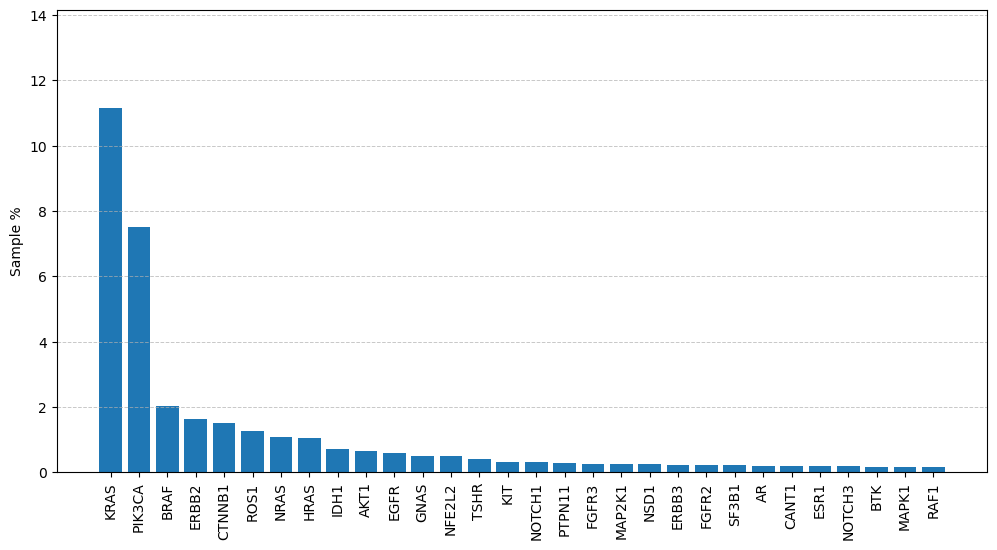

      Gene  Unique Sample Count  Percentage (%)
0     KRAS                  417       11.149733
1   PIK3CA                  281        7.513369
2     BRAF                   76        2.032086
3    ERBB2                   61        1.631016
4   CTNNB1                   56        1.497326
5     ROS1                   47        1.256684
6     NRAS                   40        1.069519
7     HRAS                   39        1.042781
8     IDH1                   27        0.721925
9     AKT1                   24        0.641711
10    EGFR                   22        0.588235
11    GNAS                   19        0.508021
12  NFE2L2                   19        0.508021
13    TSHR                   15        0.401070
14     KIT                   12        0.320856
15  NOTCH1                   12        0.320856
16  PTPN11                   11        0.294118
17   FGFR3                   10        0.267380
18  MAP2K1                    9        0.240642
19    NSD1                    9        0

In [31]:
# --- Bar Plot 1: Top Genes ---

# Calculate unique sample counts for each gene
unique_gene_counts = oncogene_df.groupby('Ref.Gene')['Sample_Name'].nunique()

#################################################################################
# Calculate the total number of unique samples in the df cohort (1375)
total_unique_samples = total_unique_samples_in_df
#                                       OR                                      #
# Calculate the total number of unique samples in the oncogene_df cohort
# total_unique_samples = oncogene_df['Sample_Name'].nunique()
#################################################################################

# percentage representation based on total unique samples
unique_gene_percentage = (unique_gene_counts / total_unique_samples) * 100

# Select the top genes based on unique sample counts
top_genes_unique = unique_gene_percentage.nlargest(30)
top_counts_unique = unique_gene_counts.loc[top_genes_unique.index]  # Actual unique sample counts

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_genes_unique.index, top_genes_unique.values)

# Annotate each bar with percentage (rotated 90 degrees, outside the bar)
# for bar, gene in zip(bars, top_genes_unique.index):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  # Shift slightly above
#              f'{bar.get_height():.1f}%', ha='center', va='bottom', 
#              fontsize=10, rotation=90, fontweight='bold')

# Modify x-tick labels: Gene name at 90 degrees
plt.xticks(range(len(top_genes_unique.index)), top_genes_unique.index, rotation=90, ha='center')

plt.ylabel('Sample %')
#plt.title('Top 50 Oncogenes by Unique Sample Frequency')

# Add grid in the background
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.ylim(0, max(top_genes_unique.values) + 3)  # Adjust y-limits to accommodate labels

# Show plot
plt.show()

# Create a corrected table
table_oncogene_df = pd.DataFrame({
    'Gene': top_genes_unique.index,
    'Unique Sample Count': top_counts_unique.values,
    'Percentage (%)': top_genes_unique.values
})

print(table_oncogene_df)

In [32]:
table_oncogene_df.to_clipboard()

---

## TSG

In [34]:
#--- Pathogenic TSG Viz ---#
# Subset for tsg
tsg_df = patho_only_df[patho_only_df["OncoG_TSG"].isin(['TSG', 'Both'])]
tsg_df.head()

,Sample_Name,CHROM_x,POS_x,End_x,REF_x,ALT_x,Ref.Gene,Func.ensGene,ExonicFunc.ensGene,AAChange.ensGene,...,avsnp150,CLNDN,CLNDISDB,clinvar: Clinvar,Hotspot,OncoG_TSG,Kinase,Cancer,Cancer_Short,Data Classification
6269,IN-423-TKZC-F-IE-RE,chr5,56155678.0,56155678.0,C,T,MAP3K1,exonic,nonsynonymous SNV,ENSG00000095015:ENST00000399503:exon3:c.C770T:...,...,rs56160159,"46,XY_sex_reversal,_type_6","MedGen:C3151064,OMIM:613762",clinvar: Likely_pathogenic,0,TSG,1,Rectum,RC,Exome Panel/Absolute
7676,IN-423-TL2C-F-IE,chr17,7577094.0,7577094.0,G,C,TP53,exonic,nonsynonymous SNV,ENSG00000141510:ENST00000509690:exon5:c.C448G:...,...,rs28934574,"Hepatocellular_carcinoma|Renal_cell_carcinoma,...","Human_Phenotype_Ontology:HP:0001402,MedGen:C22...",clinvar: Pathogenic,0,TSG,0,Kidney,KC,Exome Panel/Absolute
8569,IN-423-TL2D-F-IE,chr17,7577538.0,7577538.0,C,T,TP53,exonic,nonsynonymous SNV,ENSG00000141510:ENST00000509690:exon4:c.G347A:...,...,rs11540652,Li-Fraumeni_syndrome_1|Hepatocellular_carcinom...,"Gene:553989,MedGen:C1835398,OMIM:151623|Human_...",clinvar: Pathogenic/Likely_pathogenic,1,TSG,0,Thyroid,TC,Exome Panel/Absolute
9560,IN-423-TL5A-F-RE,chr17,7577114.0,7577114.0,C,T,TP53,exonic,nonsynonymous SNV,ENSG00000141510:ENST00000509690:exon5:c.G428A:...,...,rs863224451,Hepatocellular_carcinoma|Chronic_lymphocytic_l...,"Human_Phenotype_Ontology:HP:0001402,MedGen:C22...",clinvar: Pathogenic/Likely_pathogenic,0,TSG,0,Esophagus,EC,Exome Panel/Absolute
13105,IN-423-TLGA-Z-IE-RE,chr1,161284196.0,161284196.0,A,G,SDHC,exonic,nonsynonymous SNV,ENSG00000143252:ENST00000342751:exon1:c.A1G:p....,...,rs755235380,Hereditary_cancer-predisposing_syndrome|Paraga...,"MedGen:C0027672,SNOMED_CT:699346009|MedGen:C18...",clinvar: Pathogenic,0,TSG,0,Breast,BC,Exome Panel/Absolute


In [35]:
print(tsg_df.shape)
tsg_df['Sample_Name'].nunique()

(2319, 21)


1577

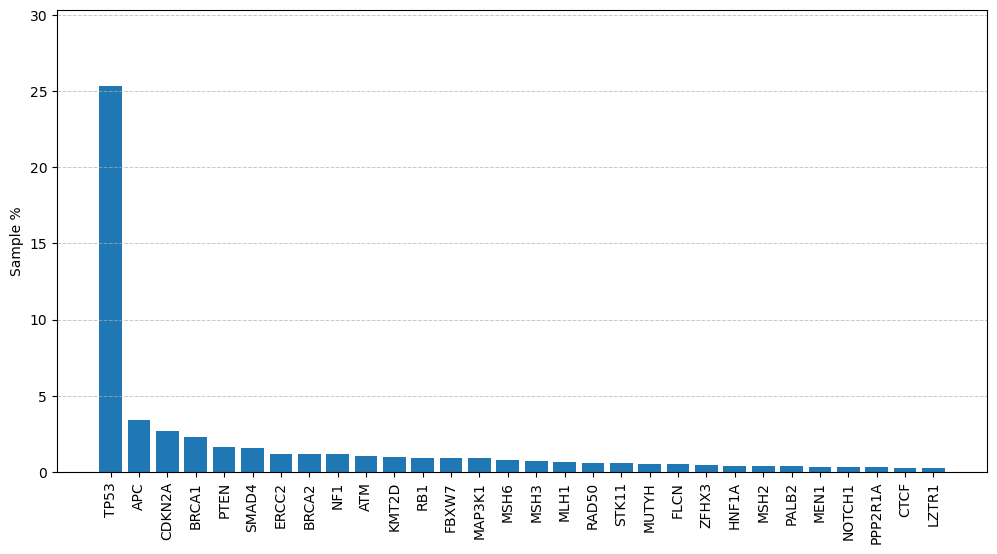

       Gene  Unique Sample Count  Percentage (%)
0      TP53                  948       25.347594
1       APC                  127        3.395722
2    CDKN2A                   99        2.647059
3     BRCA1                   86        2.299465
4      PTEN                   61        1.631016
5     SMAD4                   58        1.550802
6     ERCC2                   44        1.176471
7     BRCA2                   43        1.149733
8       NF1                   43        1.149733
9       ATM                   39        1.042781
10    KMT2D                   36        0.962567
11      RB1                   35        0.935829
12    FBXW7                   34        0.909091
13   MAP3K1                   33        0.882353
14     MSH6                   28        0.748663
15     MSH3                   26        0.695187
16     MLH1                   25        0.668449
17    RAD50                   22        0.588235
18    STK11                   22        0.588235
19    MUTYH         

In [36]:
# --- Bar Plot 1: Top Genes ---

# Calculate unique sample counts for each gene
unique_gene_counts = tsg_df.groupby('Ref.Gene')['Sample_Name'].nunique()

#################################################################################
# Calculate the total number of unique samples in the df cohort (1375)
total_unique_samples = total_unique_samples_in_df
#                                       OR                                      #
# Calculate the total number of unique samples in the tsg_df cohort
# total_unique_samples = tsg_df['Sample_Name'].nunique()
#################################################################################

# percentage representation based on total unique samples
unique_gene_percentage = (unique_gene_counts / total_unique_samples) * 100

# Select the top genes based on unique sample counts
top_genes_unique = unique_gene_percentage.nlargest(30)
top_counts_unique = unique_gene_counts.loc[top_genes_unique.index]  # Actual unique sample counts

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_genes_unique.index, top_genes_unique.values)

# Annotate each bar with percentage (rotated 90 degrees, outside the bar)
# for bar, gene in zip(bars, top_genes_unique.index):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  # Shift slightly above
#              f'{bar.get_height():.1f}%', ha='center', va='bottom', 
#              fontsize=10, rotation=90, fontweight='bold')

# Modify x-tick labels: Gene name at 90 degrees
plt.xticks(range(len(top_genes_unique.index)), top_genes_unique.index, rotation=90, ha='center')

plt.ylabel('Sample %')
#plt.title('Top 50 TSG by Unique Sample Frequency')

# Add grid in the background
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.ylim(0, max(top_genes_unique.values) + 5)  # Adjust y-limits to accommodate labels

# Show plot
plt.show()

# Create a corrected table
table_tsg_df = pd.DataFrame({
    'Gene': top_genes_unique.index,
    'Unique Sample Count': top_counts_unique.values,
    'Percentage (%)': top_genes_unique.values
})

print(table_tsg_df)

In [37]:
table_tsg_df.to_clipboard()

---

## Kinase

In [38]:
#--- Pathogenic Kinase Viz ---#
# Subset for kinase
kinase_df = patho_only_df[patho_only_df["Kinase"].isin([1])]
kinase_df.head()

,Sample_Name,CHROM_x,POS_x,End_x,REF_x,ALT_x,Ref.Gene,Func.ensGene,ExonicFunc.ensGene,AAChange.ensGene,...,avsnp150,CLNDN,CLNDISDB,clinvar: Clinvar,Hotspot,OncoG_TSG,Kinase,Cancer,Cancer_Short,Data Classification
3689,IN-423-TKXA-F2-IE2-RE,chr2,203383717.0,203383717.0,A,G,BMPR2,exonic,nonsynonymous SNV,ENSG00000204217:ENST00000374574:exon6:c.A794G:...,...,rs1085307259,Primary_pulmonary_hypertension,"MedGen:C4552070,OMIM:178600,SNOMED_CT:26174007",clinvar: Pathogenic,0,NaN,1,Sarcoma,SC,Exome Panel/Absolute
6269,IN-423-TKZC-F-IE-RE,chr5,56155678.0,56155678.0,C,T,MAP3K1,exonic,nonsynonymous SNV,ENSG00000095015:ENST00000399503:exon3:c.C770T:...,...,rs56160159,"46,XY_sex_reversal,_type_6","MedGen:C3151064,OMIM:613762",clinvar: Likely_pathogenic,0,TSG,1,Rectum,RC,Exome Panel/Absolute
32106,IN-423-UAFA-F-RE-Merged,chr11,108121480.0,108121481.0,CTG,C,ATM,exonic,frameshift deletion,ENSG00000149311:ENST00000278616:exon10:c.1288_...,...,rs587781598,Ataxia-telangiectasia_syndrome|Hereditary_canc...,"MedGen:C0004135,OMIM:208900,Orphanet:ORPHA100,...",clinvar: Pathogenic/Likely_pathogenic,0,TSG,1,Lung,LC,Exome Panel/Absolute
32628,IN-423-UAFB-F-RE,chr10,26285430.0,26285430.0,GA,G,MYO3A,exonic,frameshift deletion,ENSG00000095777:ENST00000376301:exon3:c.315del...,...,rs777580042,not_specified,MedGen:CN169374,clinvar: Likely_pathogenic,0,NaN,1,Esophagus,EC,Exome Panel/Absolute
40607,IN-423-UAMB-F-RE,chr19,4117551.0,4117551.0,A,G,MAP2K2,exonic,nonsynonymous SNV,ENSG00000126934:ENST00000262948:exon2:c.T169C:...,...,rs121434498,not_provided,MedGen:CN517202,clinvar: Pathogenic,0,Oncogene,1,Small Intestine,SIC,Exome Panel/Absolute


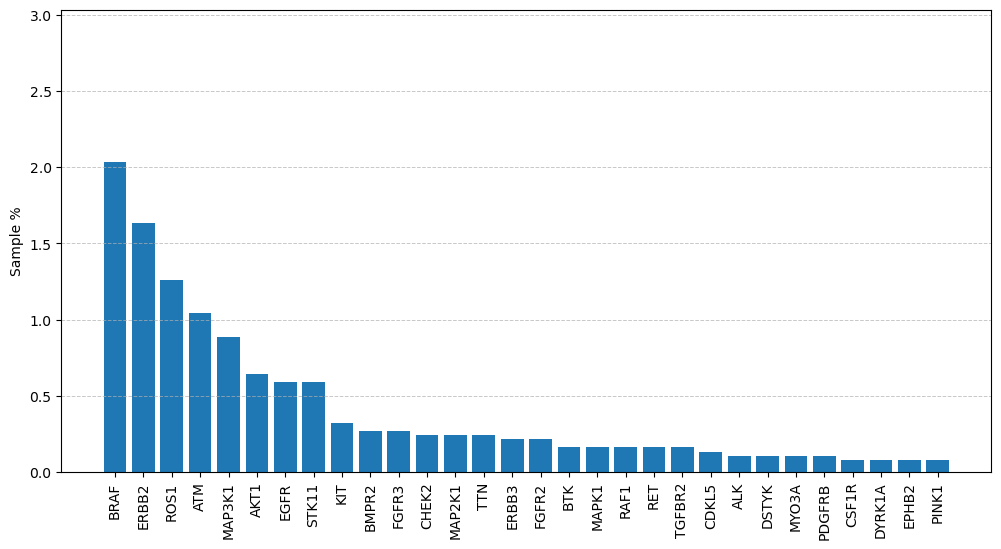

      Gene  Unique Sample Count  Percentage (%)
0     BRAF                   76        2.032086
1    ERBB2                   61        1.631016
2     ROS1                   47        1.256684
3      ATM                   39        1.042781
4   MAP3K1                   33        0.882353
5     AKT1                   24        0.641711
6     EGFR                   22        0.588235
7    STK11                   22        0.588235
8      KIT                   12        0.320856
9    BMPR2                   10        0.267380
10   FGFR3                   10        0.267380
11   CHEK2                    9        0.240642
12  MAP2K1                    9        0.240642
13     TTN                    9        0.240642
14   ERBB3                    8        0.213904
15   FGFR2                    8        0.213904
16     BTK                    6        0.160428
17   MAPK1                    6        0.160428
18    RAF1                    6        0.160428
19     RET                    6        0

In [39]:
# --- Bar Plot 1: Top Genes ---

# Calculate unique sample counts for each gene
unique_gene_counts = kinase_df.groupby('Ref.Gene')['Sample_Name'].nunique()

#################################################################################
# Calculate the total number of unique samples in the df cohort (1375)
total_unique_samples = total_unique_samples_in_df
#                                       OR                                      #
# Calculate the total number of unique samples in the kinase_df cohort
# total_unique_samples = kinase_df['Sample_Name'].nunique()
#################################################################################

# percentage representation based on total unique samples
unique_gene_percentage = (unique_gene_counts / total_unique_samples) * 100

# Select the top genes based on unique sample counts
top_genes_unique = unique_gene_percentage.nlargest(30)
top_counts_unique = unique_gene_counts.loc[top_genes_unique.index]  # Actual unique sample counts

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_genes_unique.index, top_genes_unique.values)

# Annotate each bar with percentage (rotated 90 degrees, outside the bar)
# for bar, gene in zip(bars, top_genes_unique.index):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,  # Shift slightly above
#              f'{bar.get_height():.1f}%', ha='center', va='bottom', 
#              fontsize=10, rotation=90, fontweight='bold')

# Modify x-tick labels: Gene name at 90 degrees
plt.xticks(range(len(top_genes_unique.index)), top_genes_unique.index, rotation=90, ha='center')

plt.ylabel('Sample %')
#plt.title('Top 50 kinase by Unique Sample Frequency')

# Add grid in the background
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.ylim(0, max(top_genes_unique.values)+ 1)  # Adjust y-limits to accommodate labels

# Show plot
plt.show()

# Create a corrected table
table_kinase_df = pd.DataFrame({
    'Gene': top_genes_unique.index,
    'Unique Sample Count': top_counts_unique.values,
    'Percentage (%)': top_genes_unique.values
})

print(table_kinase_df)

In [40]:
table_kinase_df.to_clipboard()

---

## Amino Acid mapping

In [ ]:
# # Select columns: 'Ref.Gene', 'AAChange.ensGene', 'avsnp150'
# patho_aa_df = patho_only_df.loc[:, ['Ref.Gene', 'avsnp150', 'AAChange.ensGene']]
# # Drop duplicate rows across all columns
# patho_aa_df = patho_aa_df.drop_duplicates()
# # Filter rows based on column: 'AAChange.ensGene' not begining with .
# patho_aa_df = patho_aa_df[~patho_aa_df['AAChange.ensGene'].str.startswith(".", na=False)]
# len(patho_aa_df)
# # Extract reference and alternate amino acids
# patho_aa_df["Ref_AA"] = patho_aa_df["AAChange.ensGene"].str.extract(r"p\.([A-Z])[0-9]+[A-Z]")[0]
# patho_aa_df["Alt_AA"] = patho_aa_df["AAChange.ensGene"].str.extract(r"p\.[A-Z][0-9]+([A-Z])")[0]
# patho_aa_df.head()
# # Amino acid single-letter to full name mapping
# amino_acid_map = {
#     "A": "Alanine", "R": "Arginine", "N": "Asparagine", "D": "Aspartic acid",
#     "C": "Cysteine", "Q": "Glutamine", "E": "Glutamic acid", "G": "Glycine",
#     "H": "Histidine", "I": "Isoleucine", "L": "Leucine", "K": "Lysine",
#     "M": "Methionine", "F": "Phenylalanine", "P": "Proline", "S": "Serine",
#     "T": "Threonine", "W": "Tryptophan", "Y": "Tyrosine", "V": "Valine"
# }

# # Map single-letter amino acids to full names
# patho_aa_df["Ref_AA_Full"] = patho_aa_df["Ref_AA"].map(amino_acid_map)
# patho_aa_df["Alt_AA_Full"] = patho_aa_df["Alt_AA"].map(amino_acid_map)
# patho_aa_df.head()
# # Amino acid group classification bt side chain
# amino_acid_groups = {
#     "Aliphatic Amino Acids with Hydrophobic Side Chain": ["Alanine", "Valine", "Leucine", "Isoleucine", "Methionine"],
#     "Aromatic Amino Acids with Hydrophobic Side Chain": ["Phenylalanine", "Tryptophan", "Tyrosine"],
#     "Amino Acids with Neutral Side Chain": ["Serine", "Threonine", "Cysteine", "Asparagine", "Glutamine"],
#     "Amino Acids with Negative Charged Side Chain (Acidic)": ["Aspartic acid", "Glutamic acid"],
#     "Amino Acids with Positive Charged Side Chain (Basic)": ["Lysine", "Arginine", "Histidine"],
#     "Imino Acid": ["Proline"],
#     "Unique Amino Acid": ["Glycine"]
# }

# # Reverse mapping for group assignment
# group_mapping = {}
# for group, acids in amino_acid_groups.items():
#     for acid in acids:
#         group_mapping[acid] = group

# # Assign groups based on full names
# patho_aa_df["Ref_Group"] = patho_aa_df["Ref_AA_Full"].map(group_mapping)
# patho_aa_df["Alt_Group"] = patho_aa_df["Alt_AA_Full"].map(group_mapping)

# # Determine substitution type
# def substitution_type(ref_group, alt_group):
#     if ref_group == alt_group:
#         return "Intra"
#     return "Inter"

# patho_aa_df["Substitution_Type"] = patho_aa_df.apply(
#     lambda x: substitution_type(x["Ref_Group"], x["Alt_Group"]), axis=1
# )

# # Display the DataFrame
# print(patho_aa_df)


---

## All Genes Cancer Distribution

In [55]:
# Cancer Counts
patho_only_df.groupby('Cancer_Short')['Sample_Name'].nunique().reset_index(name='Unique_Sample_Count')

,Cancer_Short,Unique_Sample_Count
0,BC,238
1,BrC,28
2,CC,32
3,EC,58
4,GBC,106
5,HNC,73
6,KC,29
7,LBC,120
8,LC,477
9,LIC,248


In [57]:
patho_only_cancercounts = patho_only_df.groupby(['Cancer_Short', 'Cancer'])['Sample_Name'].nunique().reset_index(name='Unique_Sample_Count')
patho_only_cancercounts.to_clipboard()

In [56]:
patho_only_df.groupby('Cancer_Short')['Ref.Gene'].nunique().reset_index(name='Gene_Count')

,Cancer_Short,Gene_Count
0,BC,196
1,BrC,91
2,CC,41
3,EC,79
4,GBC,115
5,HNC,81
6,KC,37
7,LBC,106
8,LC,276
9,LIC,350


In [44]:
patho_only_df.groupby('Ref.Gene')['Sample_Name'].nunique().reset_index(name='Sample_Count').sort_values(by='Sample_Count', ascending=False)

,Ref.Gene,Sample_Count
996,TP53,948
535,KRAS,417
731,PIK3CA,281
77,APC,127
177,CDKN2A,99
...,...,...
1067,ZBTB18,1
1068,ZBTB42,1
1069,ZDHHC9,1
26,ACTG2,1


In [45]:
# Count the number of samples each gene is present in
gene_sample_counts = patho_only_df.groupby("Ref.Gene")["Sample_Name"].nunique()

# Find the most common cancer type for each gene
gene_cancer_counts = patho_only_df.groupby(["Ref.Gene", "Cancer_Short"])["Sample_Name"].nunique()
most_common_cancer_per_gene = gene_cancer_counts.groupby(level=0).idxmax().apply(lambda x: x[1])

# Combine results into a dataframe
gene_summary = pd.DataFrame({
    "Sample_Count": gene_sample_counts,
    "Most_Common_Cancer": most_common_cancer_per_gene
})

print(gene_summary)


          Sample_Count Most_Common_Cancer
Ref.Gene                                 
AAAS                 1             Others
AARS2                4                 PC
AASS                 1                 SC
ABCA12               1                UtC
ABCA4               19                 LC
...                ...                ...
ZEB1                19                LBC
ZEB2                 2                BrC
ZFHX3               16                 LC
ZNF469               5                LIC
ZNF687               1                GBC

[1075 rows x 2 columns]


In [50]:
gene_summary.sort_values(by='Sample_Count', ascending=False).to_clipboard()
# gene_summary.to_clipboard()

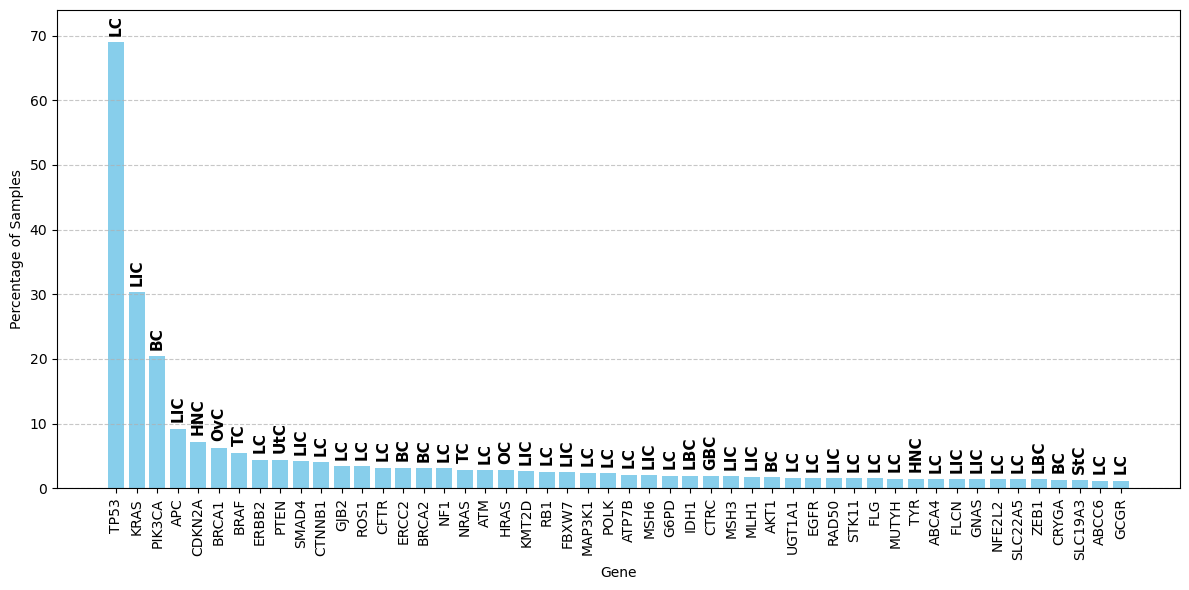

In [51]:
# Count the number of samples each gene is present in
gene_sample_counts = patho_only_df.groupby("Ref.Gene")["Sample_Name"].nunique()

# Find the most common cancer type for each gene
gene_cancer_counts = patho_only_df.groupby(["Ref.Gene", "Cancer_Short"])["Sample_Name"].nunique()
most_common_cancer_per_gene = gene_cancer_counts.groupby(level=0).idxmax().apply(lambda x: x[1])

# Combine results into a dataframe
gene_summary = pd.DataFrame({
    "Sample_Count": gene_sample_counts,
    "Most_Common_Cancer": most_common_cancer_per_gene
})

# Select top genes based on sample count
top_genes = gene_summary.nlargest(50, "Sample_Count")

# Calculate percentage sample count
top_genes["Sample_Percentage"] = (top_genes["Sample_Count"] / 1375) * 100

# Increase figure size for better readability
plt.figure(figsize=(12, 6))
bars = plt.bar(top_genes.index, top_genes["Sample_Percentage"], color="skyblue")

# Annotate bars with most common cancer type
for bar, cancer in zip(bars, top_genes["Most_Common_Cancer"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() +1, cancer, ha="center", va="bottom", fontsize=11, rotation=90, fontweight='bold')

plt.ylim(0, max(top_genes['Sample_Percentage']) + 5)  # Adjust y-limits to accommodate labels

# Formatting
plt.xlabel("Gene")
plt.ylabel("Percentage of Samples")
#plt.title("Top 50 Genes by Sample Percentage with Most Common Cancer Type (Sample Count = 1375)")
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


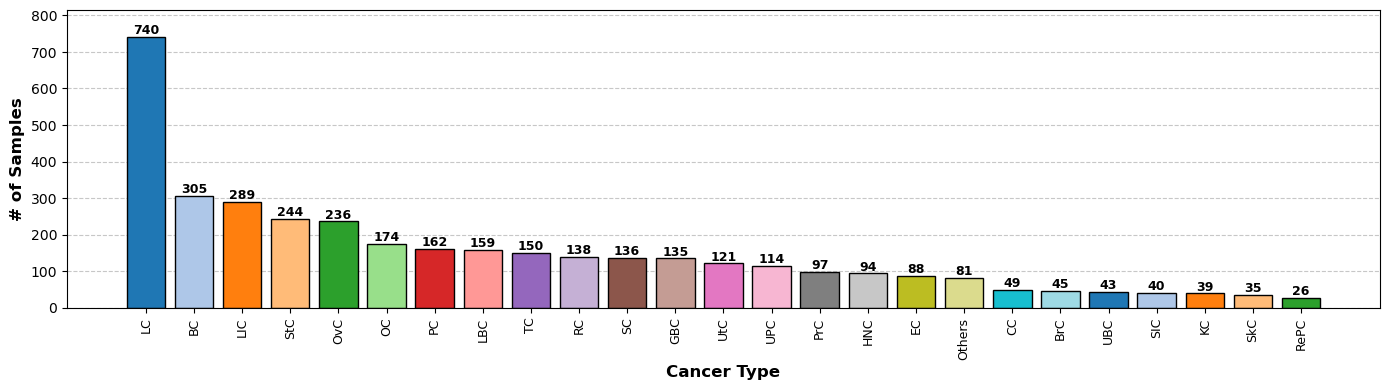

In [52]:
# Count the number of samples per cancer type for whole cancer cohort
cancer_sample_counts = df.groupby("Cancer_Short")["Sample_Name"].nunique().sort_values(ascending=False)

# Set up figure
fig, ax = plt.subplots(figsize=(14, 4))

# Generate colors for bars
colors = plt.cm.tab20.colors  # Using tab20 colormap for variety

# Create bar plot
bars = ax.bar(
    cancer_sample_counts.index, 
    cancer_sample_counts.values, 
    color=[colors[i % len(colors)] for i in range(len(cancer_sample_counts))], 
    edgecolor='black'
)

# Annotate bars with sample counts
for bar, count in zip(bars, cancer_sample_counts.values):
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height(), 
        str(count), 
        ha="center", 
        va="bottom", 
        fontsize=9, 
        fontweight="bold"
    )

# Formatting
ax.set_xlabel("Cancer Type", fontsize=12, fontweight="bold")
ax.set_ylabel("# of Samples", fontsize=12, fontweight="bold")
#ax.set_title("Sample Distribution per Cancer Type", fontsize=14, fontweight="bold")
ax.set_xticks(np.arange(len(cancer_sample_counts.index)))
ax.set_xticklabels(cancer_sample_counts.index, rotation=90, fontsize=9)
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_axisbelow(True)

# Increase y-axis limit for better spacing
ax.set_ylim(0, max(cancer_sample_counts.values) * 1.1)  # Add 10% extra space

# Adjust layout for better fit
plt.tight_layout()

# Show plot
plt.show()


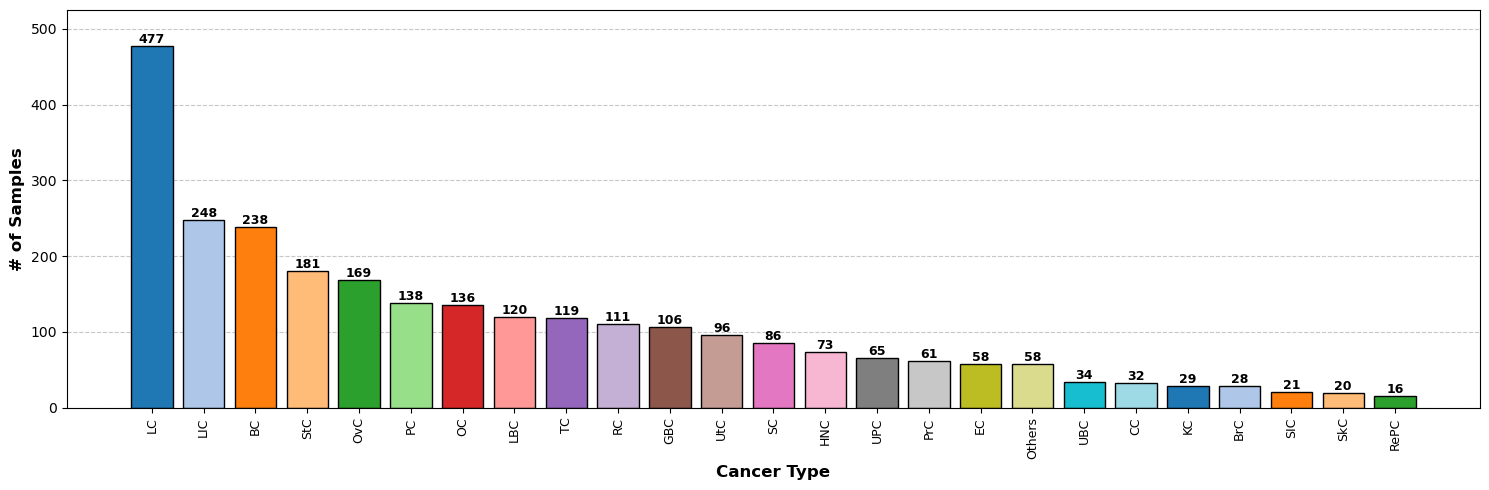

In [53]:
# Count the number of samples per cancer type for pathogenic subset
cancer_sample_counts = patho_only_df.groupby("Cancer_Short")["Sample_Name"].nunique().sort_values(ascending=False)

# Set up figure
fig, ax = plt.subplots(figsize=(15, 5))

# Generate colors for bars
colors = plt.cm.tab20.colors  # Using tab20 colormap for variety

# Create bar plot
bars = ax.bar(
    cancer_sample_counts.index, 
    cancer_sample_counts.values, 
    color=[colors[i % len(colors)] for i in range(len(cancer_sample_counts))], 
    edgecolor='black'
)

# Annotate bars with sample counts
for bar, count in zip(bars, cancer_sample_counts.values):
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height(), 
        str(count), 
        ha="center", 
        va="bottom", 
        fontsize=9, 
        fontweight="bold"
    )

# Formatting
ax.set_xlabel("Cancer Type", fontsize=12, fontweight="bold")
ax.set_ylabel("# of Samples", fontsize=12, fontweight="bold")
#ax.set_title("Sample Distribution per Cancer Type in Pathogenic only Subset", fontsize=14, fontweight="bold")
ax.set_xticks(np.arange(len(cancer_sample_counts.index)))
ax.set_xticklabels(cancer_sample_counts.index, rotation=90, fontsize=9)
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_axisbelow(True)
# Increase y-axis limit for better spacing
ax.set_ylim(0, max(cancer_sample_counts.values) * 1.1)  # Add 10% extra space


# Adjust layout for better fit
plt.tight_layout()

# Show plot
plt.show()


---

In [58]:
# --- Calculate the percentage of samples with mutant genes per cancer type --- #

# Count the number of unique samples per cancer type
unique_samples_per_cancer = patho_only_df.groupby('Cancer_Short')['Sample_Name'].nunique()
# Count the number of mutations per cancer type
mutation_counts = patho_only_df['Cancer_Short'].value_counts()
# Count the number of unique genes per cancer type
mutant_gene_counts = patho_only_df.groupby('Cancer_Short')['Ref.Gene'].nunique()


# Calculate the percentage
gene_by_mutation = (mutant_gene_counts / mutation_counts) * 100
mutation_by_gene = (mutation_counts / mutant_gene_counts) * 100
# Calculate the percentage of unique samples with mutant genes per cancer type
gene_by_sample = (mutant_gene_counts / unique_samples_per_cancer) * 100

mutation_by_sample = (mutation_counts / unique_samples_per_cancer ) * 100

# Identify the most frequently mutated gene for each cancer type
most_mutated_gene = patho_only_df.groupby('Cancer_Short')['Ref.Gene'].agg(lambda x: x.value_counts().idxmax())

# Combine the results into a single DataFrame
mutation_summary = pd.DataFrame({
    'Total Unique Samples': unique_samples_per_cancer,
    'Total Mutations': mutation_counts,
    'Unique Mutant Genes': mutant_gene_counts,
    'Gene/Mutations': gene_by_mutation,
    'Mutations/Gene': mutation_by_gene,
    'Genes/Samples': gene_by_sample,
    'Muatations/Samples': mutation_by_sample,
    'Most Mutated Gene': most_mutated_gene
}).reset_index().rename(columns={'index': 'Cancer_Short'})

mutation_summary.head(n=50)


,Cancer_Short,Total Unique Samples,Total Mutations,Unique Mutant Genes,Gene/Mutations,Mutations/Gene,Genes/Samples,Muatations/Samples,Most Mutated Gene
0,BC,238,469,196,41.791045,239.285714,82.352941,197.058824,PIK3CA
1,BrC,28,116,91,78.448276,127.472527,325.000000,414.285714,IDH1
2,CC,32,65,41,63.076923,158.536585,128.125000,203.125000,PIK3CA
3,EC,58,126,79,62.698413,159.493671,136.206897,217.241379,TP53
4,GBC,106,234,115,49.145299,203.478261,108.490566,220.754717,TP53
5,HNC,73,179,81,45.251397,220.987654,110.958904,245.205479,TP53
6,KC,29,51,37,72.549020,137.837838,127.586207,175.862069,VHL
7,LBC,120,218,106,48.623853,205.660377,88.333333,181.666667,TP53
8,LC,477,803,276,34.371108,290.942029,57.861635,168.343816,TP53
9,LIC,248,962,350,36.382536,274.857143,141.129032,387.903226,KRAS


In [64]:
# --- Calculate the percentage of samples with mutant genes per cancer type --- #

# Count the number of unique samples per cancer type
unique_samples_per_cancer_df = df.groupby('Cancer_Short')['Sample_Name'].nunique()
# Count the number of unique samples per cancer type
unique_samples_per_cancer_patho_df = patho_only_df.groupby('Cancer_Short')['Sample_Name'].nunique()

# Identify the most frequently mutated gene for each cancer type
most_mutated_patho_gene = patho_only_df.groupby('Cancer_Short')['Ref.Gene'].agg(lambda x: x.value_counts().idxmax())

# Combine the results into a single DataFrame
mutation_summary = pd.DataFrame({
    'Total Unique Samples': unique_samples_per_cancer_df,
    'Total Unique Samples having Pathogenic Mutation': unique_samples_per_cancer_patho_df,
    'Most Mutated Gene': most_mutated_patho_gene
}).reset_index().rename(columns={'index': 'Cancer_Short'})

mutation_summary.head(n=50)

,Cancer_Short,Total Unique Samples,Total Unique Samples having Pathogenic Mutation,Most Mutated Gene
0,BC,305,238,PIK3CA
1,BrC,45,28,IDH1
2,CC,49,32,PIK3CA
3,EC,88,58,TP53
4,GBC,135,106,TP53
5,HNC,94,73,TP53
6,KC,39,29,VHL
7,LBC,159,120,TP53
8,LC,740,477,TP53
9,LIC,289,248,KRAS


In [65]:
mutation_summary.to_clipboard()

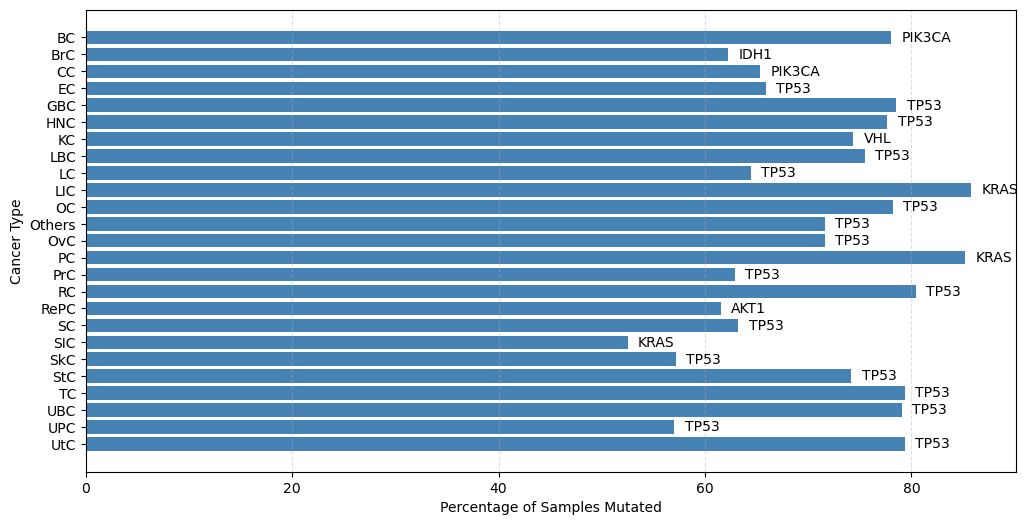

In [66]:
# Update the bar chart to annotate with most mutated gene
df_updated = mutation_summary

# Calculate the percentage of samples mutated
df_updated["Percentage Mutated"] = (df_updated["Total Unique Samples having Pathogenic Mutation"] / df_updated["Total Unique Samples"]) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(df_updated["Cancer_Short"], df_updated["Percentage Mutated"], color="steelblue")
plt.xlabel("Percentage of Samples Mutated")
plt.ylabel("Cancer Type")
#plt.title("Percentage of Unique Samples Having Pathogenic Mutation per Cancer Type with Most Mutated Gene labelled")

# Annotate bars with the most mutated gene
for bar, gene in zip(bars, df_updated["Most Mutated Gene"]):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, gene, va='center')

plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Add vertical grid lines
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Display the plot
plt.show()


---

In [ ]:
# --- Heatmap with Count ---#
# Count unique samples per gene and Cancer type
gene_mutation_counts = patho_only_df.groupby(["Ref.Gene", "Cancer_Short"])["Sample_Name"].nunique().reset_index()
gene_mutation_counts.columns = ["Gene", "Cancer_Short", "Unique Mutation Count"]

# Pivot the data for heatmap plotting
heatmap_data = gene_mutation_counts.pivot(index="Gene", columns="Cancer_Short", values="Unique Mutation Count")

# Select the top 30 genes with the highest mutation counts
top_genes = heatmap_data.sum(axis=1).sort_values(ascending=False).head(30).index
heatmap_data_filtered = heatmap_data.loc[top_genes]

# Plot the improved heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data_filtered, cmap="Blues", linewidths=0.5, annot=True, fmt=".0f")

# Set labels and title
plt.xlabel("Cancer Type", fontsize=12)
plt.ylabel("Pathogenic Genes", fontsize=12)
plt.title("Top 30 Mutated Genes Across Cancer Types", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Display the refined heatmap
plt.show()

# Display the heatmap
plt.show()

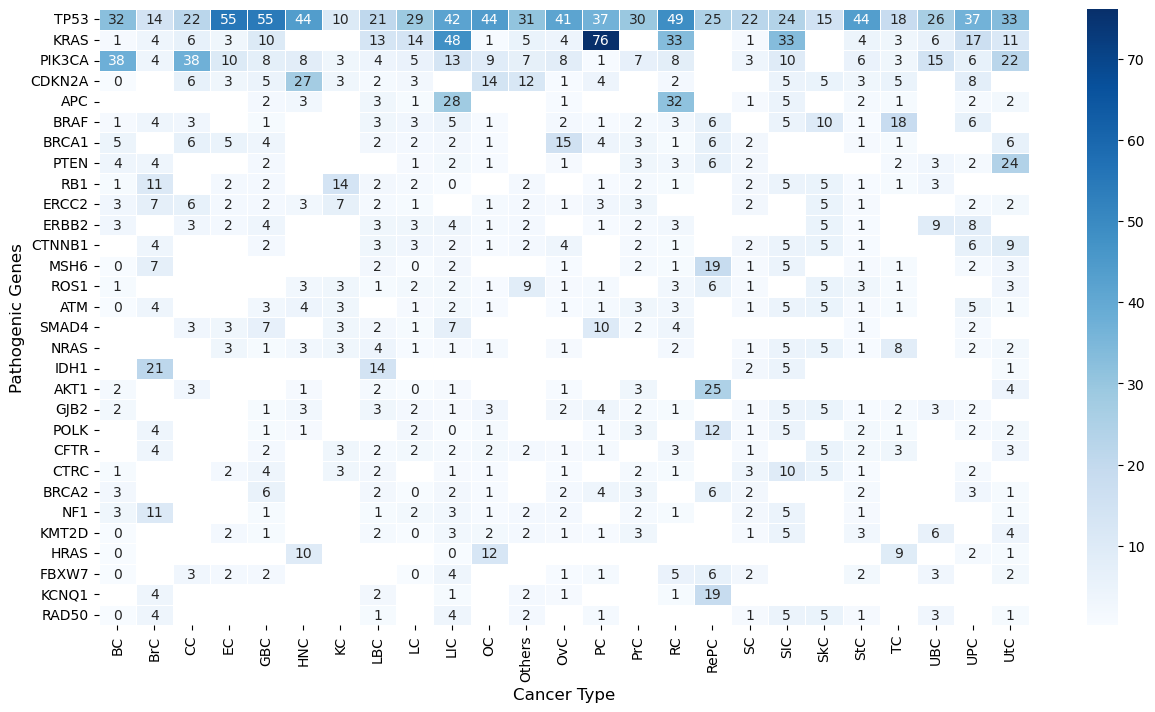

In [67]:
# --- Heatmap with Percentage --- #
# Count unique samples per gene and cancer type
gene_mutation_counts = patho_only_df.groupby(["Ref.Gene", "Cancer_Short"])["Sample_Name"].nunique().reset_index()
gene_mutation_counts.columns = ["Gene", "Cancer_Short", "Unique Mutation Count"]

# Count total unique samples per cancer type
total_samples_per_cancer_df = patho_only_df.groupby("Cancer_Short")["Sample_Name"].nunique().reset_index()
total_samples_per_cancer_df.columns = ["Cancer_Short", "Total Unique Samples"]

# Merge the mutation counts with total sample counts
gene_mutation_percentage_df = gene_mutation_counts.merge(total_samples_per_cancer_df, on="Cancer_Short")

# Calculate the mutation percentage per gene and cancer type
gene_mutation_percentage_df["Mutation Percentage"] = (
    gene_mutation_percentage_df["Unique Mutation Count"] / gene_mutation_percentage_df["Total Unique Samples"]
) * 100

# Pivot the data for heatmap plotting
heatmap_data = gene_mutation_percentage_df.pivot(index="Gene", columns="Cancer_Short", values="Mutation Percentage")

# Select the top 30 genes with the highest mutation counts
top_genes = heatmap_data.sum(axis=1).sort_values(ascending=False).head(30).index
heatmap_data_filtered = heatmap_data.loc[top_genes]

# Plot the improved heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data_filtered, cmap="Blues", linewidths=0.5, annot=True, fmt=".0f")

# Set labels and title
plt.xlabel("Cancer Type", fontsize=12)
plt.ylabel("Pathogenic Genes", fontsize=12)
#plt.title("Top 30 Pathogenic Genes Across Cancer Types with counts as percentage", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Display the refined heatmap
plt.show()

# Display the heatmap
plt.show()


In [69]:
heatmap_data_filtered.to_clipboard()

---

/tmp/ipykernel_1846914/3237902464.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = patho_only_df[df["ExonicFunc.ensGene"] != "."]
/tmp/ipykernel_1846914/3237902464.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["ExonicFunc.ensGene"] = filtered_df["ExonicFunc.ensGene"].str.lower()
/tmp/ipykernel_1846914/3237902464.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  set2_colors = cm.get_cmap("Set2", len(filtered_exonic_func_counts.columns)).colors


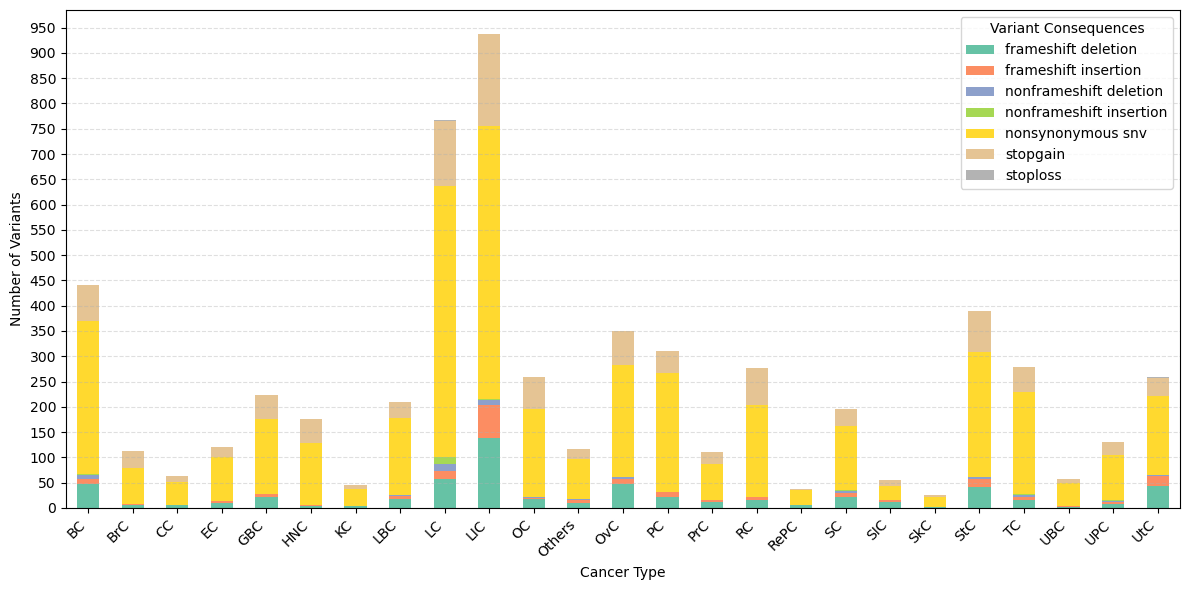

In [70]:
# --- For plotting the ExonicFunc.ensGene distribution per Cancer type --- #

# Filter out rows where ExonicFunc.ensGene is "."
filtered_df = patho_only_df[df["ExonicFunc.ensGene"] != "."]

# Count occurrences of each ExonicFunc.ensGene per Cancer type
filtered_df["ExonicFunc.ensGene"] = filtered_df["ExonicFunc.ensGene"].str.lower()

filtered_exonic_func_counts = filtered_df.groupby(["Cancer_Short", "ExonicFunc.ensGene"]).size().unstack(fill_value=0)

# Increase figure size for better label alignment
fig, ax = plt.subplots(figsize=(12, 6))

# Define color mapping using Set2 qualitative colormap
set2_colors = cm.get_cmap("Set2", len(filtered_exonic_func_counts.columns)).colors
color_map = {func: set2_colors[i % len(set2_colors)] for i, func in enumerate(filtered_exonic_func_counts.columns)}

# Plot the stacked bar chart with Set2 colormap
filtered_exonic_func_counts.plot(kind="bar", stacked=True, color=[color_map[func] for func in filtered_exonic_func_counts.columns], ax=ax)

# Improve layout and readability
plt.xlabel("Cancer Type")
plt.ylabel("Number of Variants")
#plt.title("Distribution of ExonicFunc.ensGene per Cancer Type (Excluding '.')")
plt.xticks(rotation=45, ha='right')  # Align x-axis labels properly
plt.legend(title="Variant Consequences", bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Set y-axis ticks at intervals
ax.set_yticks(np.arange(0, filtered_exonic_func_counts.sum(axis=1).max() + 50, 50))

# Show the plot
plt.show()

In [71]:
filtered_exonic_func_counts.head(n=20)


ExonicFunc.ensGene,frameshift deletion,frameshift insertion,nonframeshift deletion,nonframeshift insertion,nonsynonymous snv,stopgain,stoploss
Cancer_Short,,,,,,,
BC,48,10,7,3,301,71,1
BrC,6,1,1,0,71,33,0
CC,6,0,0,0,46,11,0
EC,9,4,1,0,86,21,0
GBC,21,6,1,0,148,47,0
HNC,4,1,0,0,124,46,0
KC,4,0,0,0,33,8,0
LBC,17,7,1,0,152,33,0
LC,58,15,14,13,536,130,2


In [72]:
# Calculate the total for each Cancer type
filtered_exonic_func_counts["Total"] = filtered_exonic_func_counts.sum(axis=1)

# Compute the percentage for each exonic term
percentage_filtered_exonic_func_counts = filtered_exonic_func_counts.div(filtered_exonic_func_counts["Total"], axis=0) * 100

# Drop the "Total" column after computing percentages
percentage_filtered_exonic_func_counts.drop(columns=["Total"], inplace=True)

/tmp/ipykernel_1846914/3577885679.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  set2_colors = cm.get_cmap("Set2", len(percentage_filtered_exonic_func_counts.columns)).colors


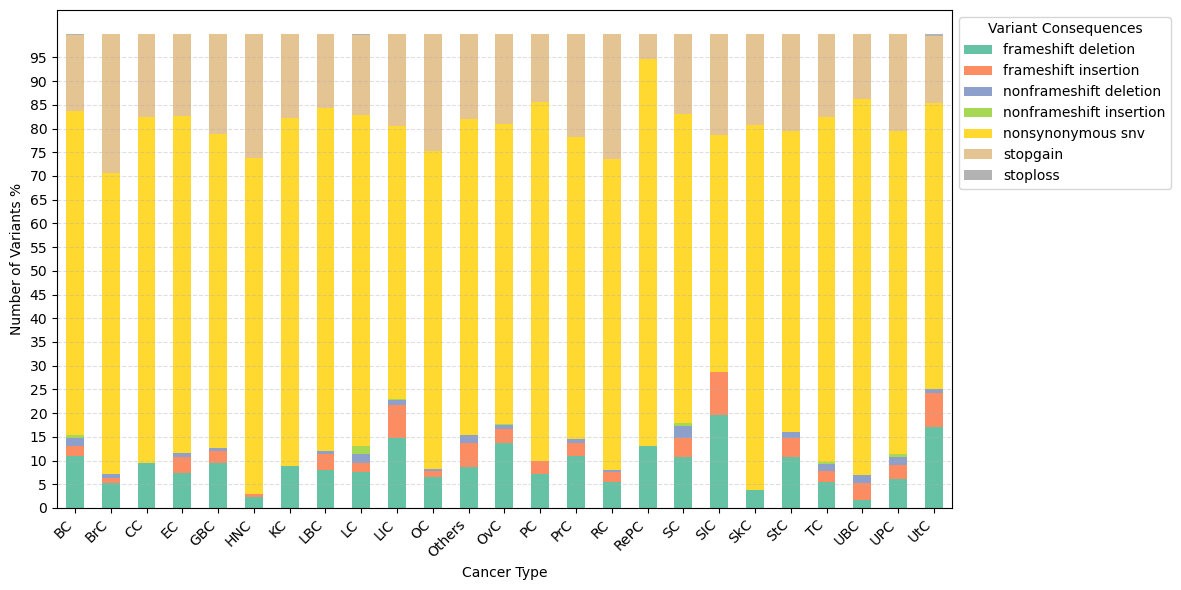

In [73]:
# Increase figure size for better label alignment
fig, ax = plt.subplots(figsize=(12, 6))

# Define color mapping using Set2 qualitative colormap
set2_colors = cm.get_cmap("Set2", len(percentage_filtered_exonic_func_counts.columns)).colors
color_map = {func: set2_colors[i % len(set2_colors)] for i, func in enumerate(percentage_filtered_exonic_func_counts.columns)}

# Plot the stacked bar chart with Set2 colormap
percentage_filtered_exonic_func_counts.plot(kind="bar", stacked=True, color=[color_map[func] for func in percentage_filtered_exonic_func_counts.columns], ax=ax)

# Improve layout and readability
plt.xlabel("Cancer Type")
plt.ylabel("Number of Variants %")
#plt.title("Unique ExonicFunc.ensGene Counts by Pathogenic Gene per Cancer Type")
plt.xticks(rotation=45, ha='right')  # Align x-axis labels properly
plt.legend(title="Variant Consequences", bbox_to_anchor=(1, 1))
plt.tight_layout()

# Set y-axis ticks at intervals of 5
ax.set_yticks(np.arange(0, percentage_filtered_exonic_func_counts.sum(axis=1).max(), 5))

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Show the plot
plt.show()

In [74]:
percentage_filtered_exonic_func_counts.to_clipboard()

# Mutual Exclusivity and Co-Occurence plot made in R through Maftools